In [210]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# !git clone https://github.com/GiancarloCroce/DCA_SARS-CoV-2

ROOT = os.getcwd().replace('/main.ipynb', '/')
DATA = '/DCA_SARS-CoV-2/data/'

#Load Immune Epitope Database
meff_df = pd.read_csv(ROOT+DATA+'data_meff.csv', engine='python')
iedb_rdb_bt_df = pd.read_csv(ROOT+DATA+'data_dca_iedb_RDB_domain_BTcell.csv', engine='python')
iedb_rdb_df = pd.read_csv(ROOT+DATA+'data_dca_iedb_RDB_domain.csv', engine='python')
proteome_df = pd.read_csv(ROOT+DATA+'data_dca_proteome.csv', engine='python')

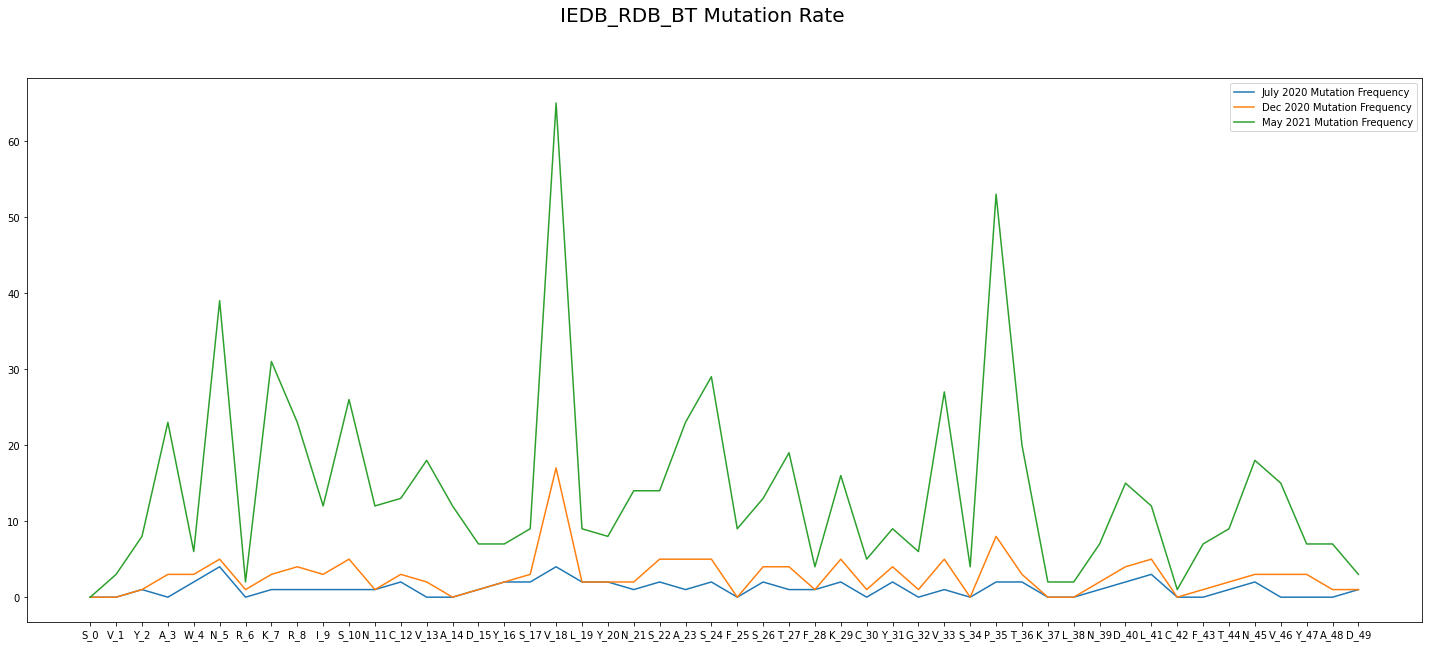

,protein,domain,position_protein,position_domain,aa_Wuhan-Hu-1,mutability_score(IND),mutability_score(DCA),observed_mut_May2021,observed_mut_Dec2020,observed_mut_Jul2020,lowerbound_B_cell,upperbound_B_cell,rf_B_cell,lowerbound_T_cell,upperbound_T_cell,rf_T_cell
0,Spike,bCoV_S1_RBD,349,1.0,S,-1.3818,-1.2046,0.0,0.0,0.0,0.01,0.05,0.026846,0.12,0.25,0.175182
1,Spike,bCoV_S1_RBD,350,2.0,V,-1.9788,-1.1667,3.0,0.0,0.0,0.01,0.04,0.020270,0.12,0.25,0.175182
2,Spike,bCoV_S1_RBD,351,3.0,Y,-1.8017,-1.2678,8.0,1.0,1.0,0.04,0.09,0.061489,0.11,0.22,0.152439
3,Spike,bCoV_S1_RBD,352,4.0,A,-1.0140,-1.1347,23.0,3.0,0.0,0.02,0.06,0.030100,0.11,0.24,0.166667
4,Spike,bCoV_S1_RBD,353,5.0,W,-2.0825,-1.3433,6.0,3.0,2.0,0.01,0.05,0.026846,0.11,0.24,0.166667


In [211]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# !git clone https://github.com/GiancarloCroce/DCA_SARS-CoV-2

ROOT = os.getcwd().replace('/main.ipynb', '/')
DATA = '/DCA_SARS-CoV-2/data/'

#Load Immune Epitope Database
meff_df = pd.read_csv(ROOT+DATA+'data_meff.csv', engine='python')
iedb_rdb_bt_df = pd.read_csv(ROOT+DATA+'data_dca_iedb_RDB_domain_BTcell.csv', engine='python')
iedb_rdb_df = pd.read_csv(ROOT+DATA+'data_dca_iedb_RDB_domain.csv', engine='python')
proteome_df = pd.read_csv(ROOT+DATA+'data_dca_proteome.csv', engine='python')


def make_graph(range_idx, df, title=None):
    fig, ax = plt.subplots(figsize=(25, 10))
    if title is not None:
        fig.suptitle(title, fontsize=20)
    x = [f"{b}_{a}" for a, b in enumerate(df['aa_Wuhan-Hu-1'].tolist())]
    y_may = df['observed_mut_May2021'].tolist()
    y_dec = df['observed_mut_Dec2020'].tolist()
    y_jul = df['observed_mut_Jul2020'].tolist()
    # rf_bcell = df['rf_B_cell'].tolist()
    # rf_tcell = df['rf_T_cell'].tolist()

    
    ax.plot(x[range_idx[0]:range_idx[1]], y_jul[range_idx[0]:range_idx[1]], label='July 2020 Mutation Frequency')
    ax.plot(x[range_idx[0]:range_idx[1]], y_dec[range_idx[0]:range_idx[1]], label='Dec 2020 Mutation Frequency')
    ax.plot(x[range_idx[0]:range_idx[1]], y_may[range_idx[0]:range_idx[1]], label='May 2021 Mutation Frequency')
    # ax.plot(x[range_idx[0]:range_idx[1]], rf_bcell[range_idx[0]:range_idx[1]], label='B Cell Receptor Expression')
    # ax.plot(x[range_idx[0]:range_idx[1]], rf_tcell[range_idx[0]:range_idx[1]], label='T Cell Receptor Expression')


    try:
        y_jan = df['observed_mut_Jan2022'].tolist()
        ax.plot(x[range_idx[0], range_idx[1]], y_may[range_idx[0], range_idx[1]], label='Jan 2022 Mutation Frequency')
    except:
        pass
    
    ax.legend()

    plt.show()

make_graph([0, 50], iedb_rdb_bt_df, 'IEDB_RDB_BT Mutation Rate')
iedb_rdb_bt_df.head()


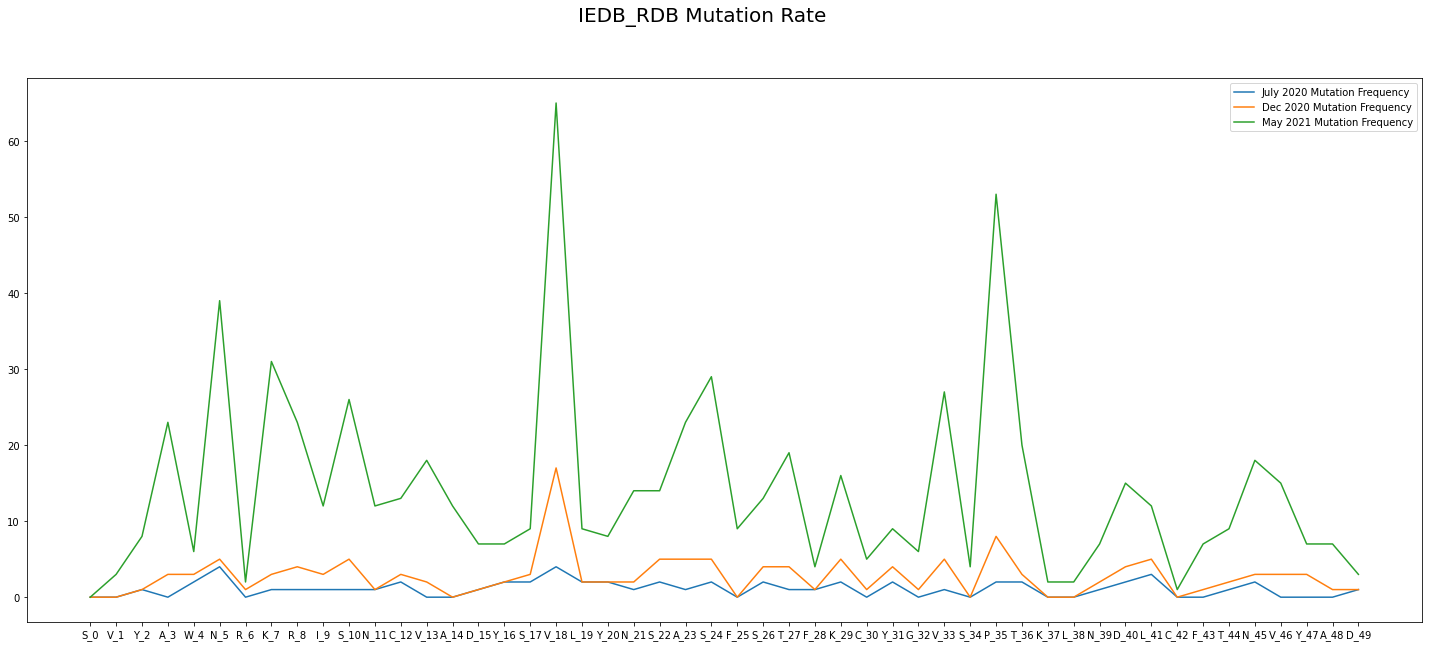

,protein,domain,position_protein,position_domain,aa_Wuhan-Hu-1,mutability_score(IND),mutability_score(DCA),observed_mut_May2021,observed_mut_Dec2020,observed_mut_Jul2020,IEDB_lowerbound,IEDB_upperbound,IEDB_response_frequency
0,Spike,bCoV_S1_RBD,349,1.0,S,-1.3818,-1.2046,0.0,0.0,0.0,0.05,0.10,0.073563
1,Spike,bCoV_S1_RBD,350,2.0,V,-1.9788,-1.1667,3.0,0.0,0.0,0.05,0.10,0.069284
2,Spike,bCoV_S1_RBD,351,3.0,Y,-1.8017,-1.2678,8.0,1.0,1.0,0.07,0.12,0.093023
3,Spike,bCoV_S1_RBD,352,4.0,A,-1.0140,-1.1347,23.0,3.0,0.0,0.05,0.10,0.069212
4,Spike,bCoV_S1_RBD,353,5.0,W,-2.0825,-1.3433,6.0,3.0,2.0,0.05,0.10,0.066986


In [212]:
make_graph([0, 50], iedb_rdb_df, 'IEDB_RDB Mutation Rate')
iedb_rdb_df.head()

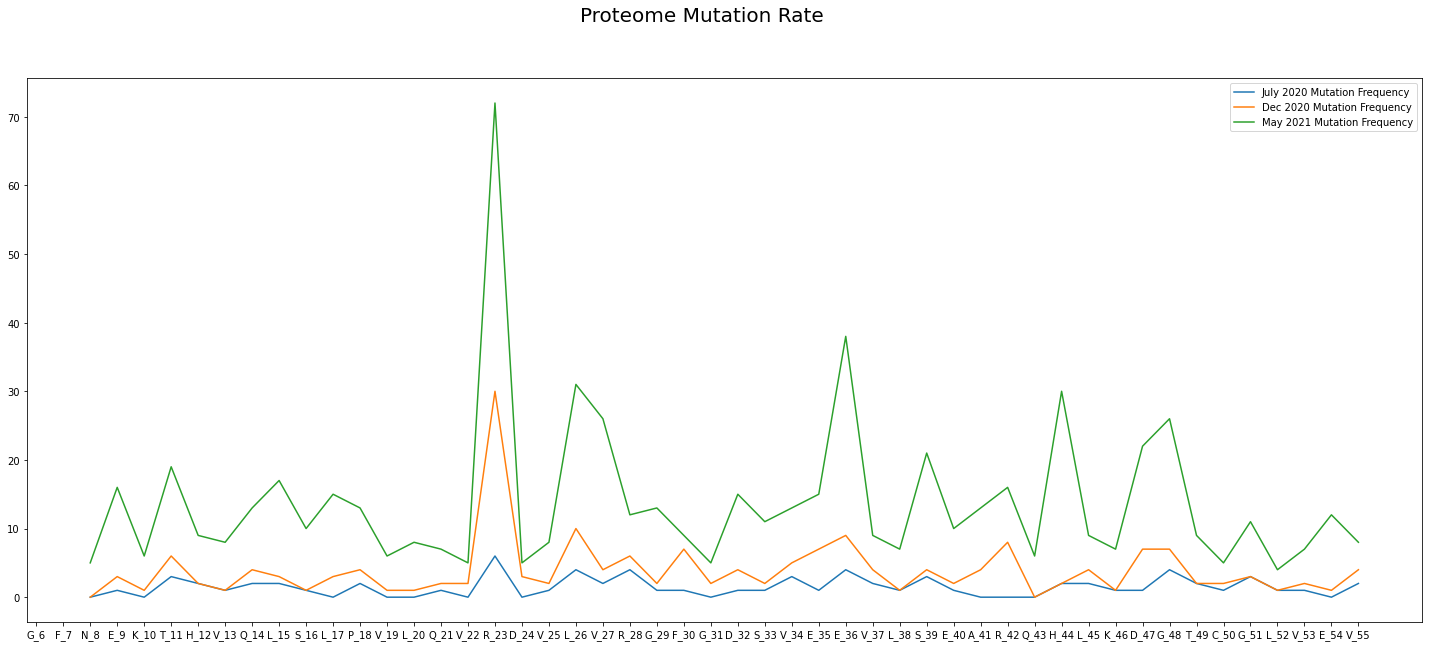

,protein,domain,position_protein,position_domain,aa_Wuhan-Hu-1,mutability_score(IND),mutability_score(DCA),observed_mut_Jul2020,observed_mut_Dec2020,observed_mut_May2021,observed_mut_Jan2022
0,ORF1a,NaN,1,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,ORF1a,NaN,2,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN
2,ORF1a,NaN,3,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
3,ORF1a,NaN,4,NaN,L,NaN,NaN,NaN,NaN,NaN,NaN
4,ORF1a,NaN,5,NaN,V,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
make_graph([6, 56], proteome_df, 'Proteome Mutation Rate')
proteome_df.head()

In [214]:
meff_df.head()

,protein,domain,Pfam_accession,M_eff,L
0,Envelope,CoV_E,PF02723.15,53,66
1,Membrane,CoV_M,PF01635.19,38,201
2,Nucleocapsid,CoV_nucleocap,PF00937.19,48,341
3,ORF1a,bCoV_NAR,PF16251.6,19,98
4,ORF1a,bCoV_NSP1,PF11501.9,12,135


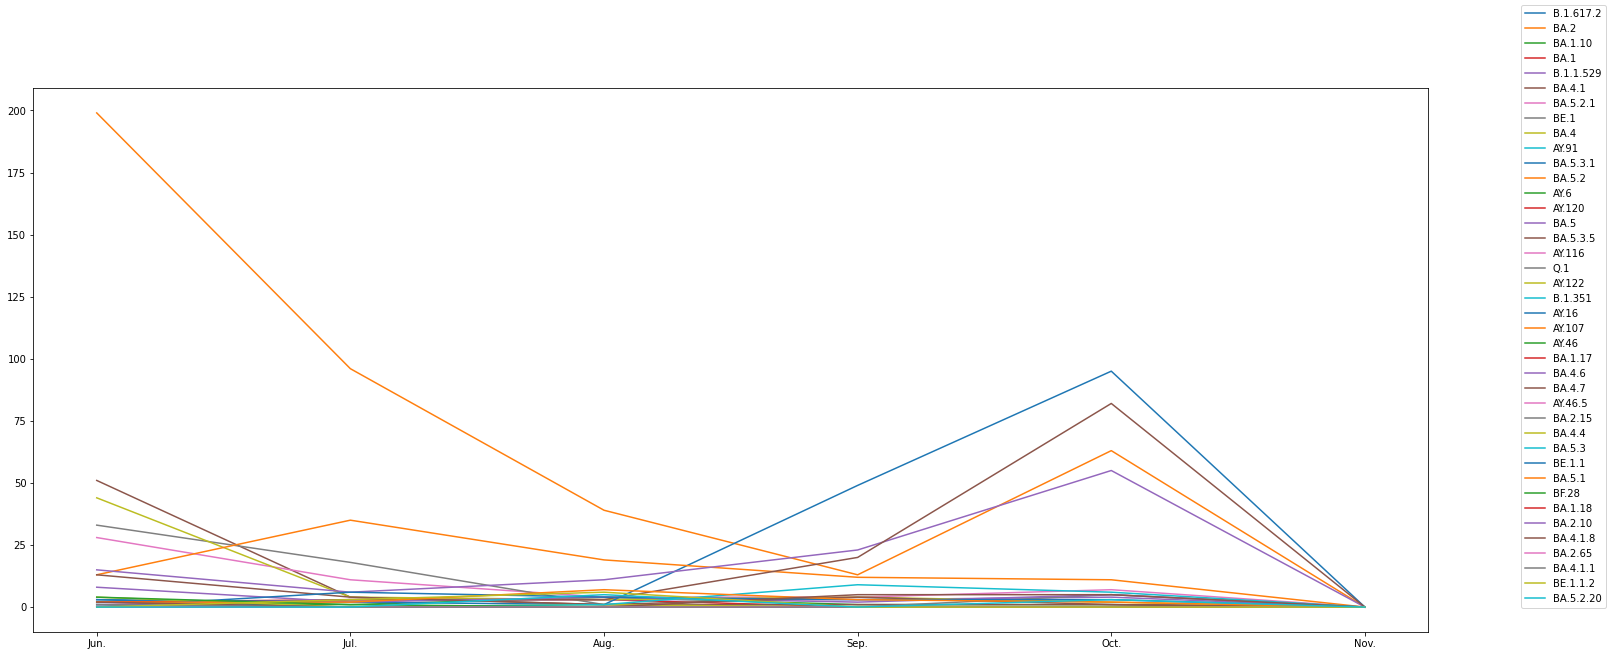

,Lineage,Jun.,Jul.,Aug.,Sep.,Oct.,Nov.,All Time
0,B.1.617.2,3,0,0,0,0,0,3237
1,BA.2,199,96,39,13,63,0,2196
2,BA.1.10,2,1,4,1,1,0,1798
3,BA.1,2,3,3,0,0,0,1137
4,B.1.1.529,1,3,3,3,4,0,226


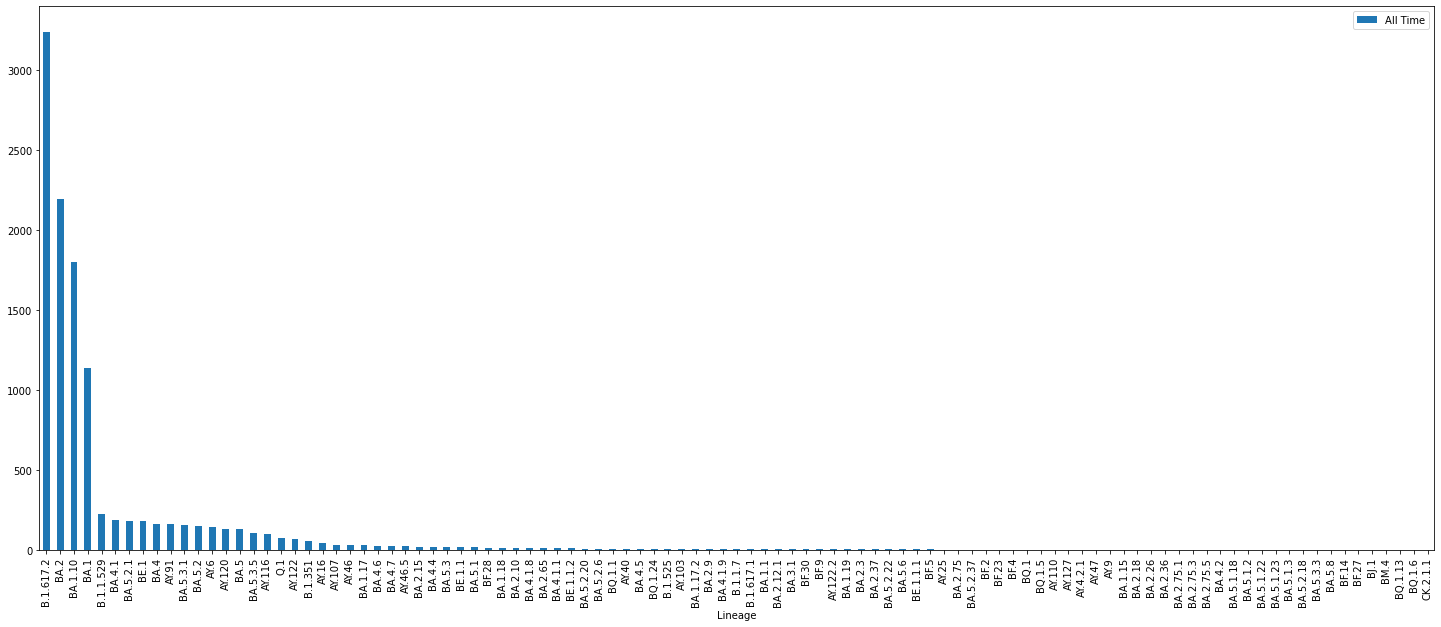

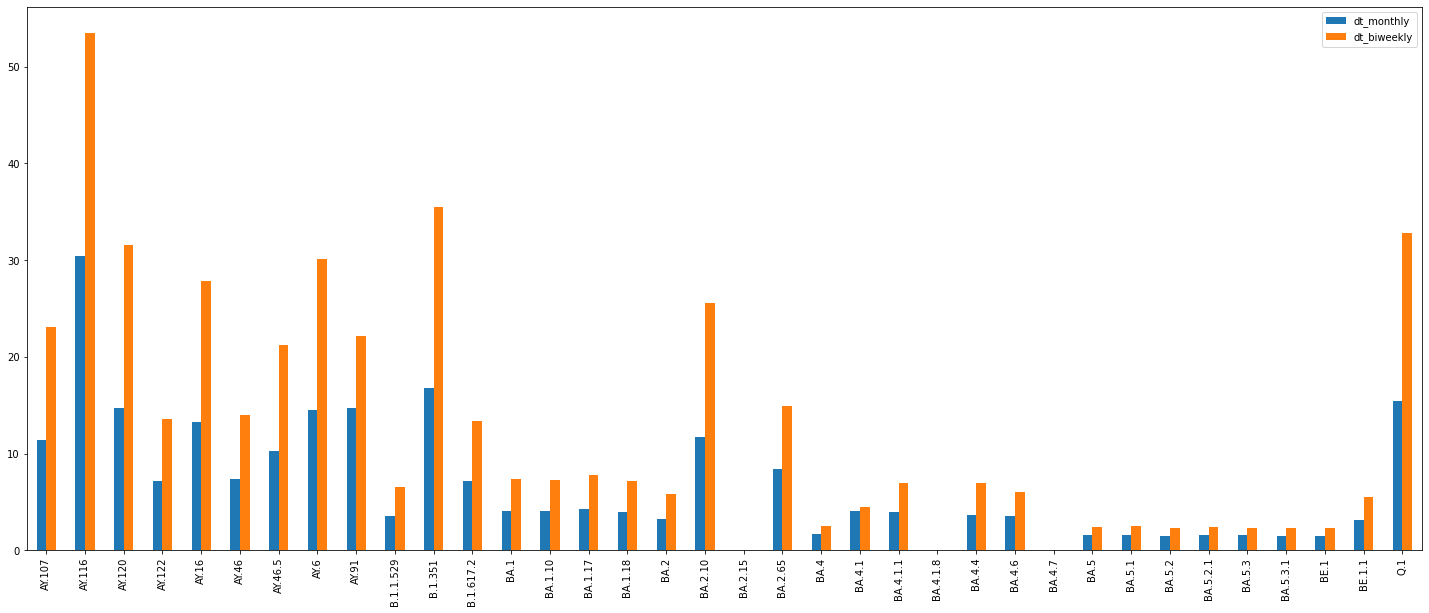

In [216]:
LINEAGES = '/lineages.csv'
lineages_df = pd.read_csv(ROOT+LINEAGES, engine='python')
sa_phylogeny = pd.read_csv(ROOT+'/sa-lineages.csv', engine='python')

sa_main = sa_phylogeny.iloc[:40]

legend = sa_main['Lineage'].tolist()
x = ['Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.']
y = np.asarray(sa_main[['Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.']])

fig, ax = plt.subplots(figsize=(25, 10))
for i in range(len(y)):
    ax.plot(x, y[i], label=legend[i])
fig.legend()
plt.show()

variant_data = lineages_df[lineages_df['lineage'].isin(legend)]
try:
    variant_data = variant_data.drop(columns=['doubling_time_mo_usa', 'doubling_time_bw_usa'])
except:
    pass

sa_phylogeny['All Time'] = sa_phylogeny['All Time'].replace(',', '', regex=True)
sa_phylogeny['All Time'] = pd.to_numeric(sa_phylogeny['All Time'])
sa_phylogeny.plot.bar(x='Lineage', y='All Time', figsize=(25, 10))

# variant_data.head()
variant_data['doubling_time_bw_not_usa'] = variant_data['doubling_time_bw_not_usa'].fillna(0)
variant_data['doubling_time_mo_not_usa'] = variant_data['doubling_time_mo_not_usa'].fillna(0)
index = variant_data['lineage'].tolist()

dt_mo = variant_data['doubling_time_mo_not_usa'].tolist()
dt_bw = variant_data['doubling_time_bw_not_usa'].tolist()
doubling_variant = pd.DataFrame({'dt_monthly': dt_mo, 'dt_biweekly': dt_bw}, index=index)
doubling_variant.plot.bar(figsize=(25, 10))

sa_main.head()

In [148]:

mutation_freq = sa_phylogeny[['Lineage', 'All Time']]
master_variant = variant_data
master_variant = master_variant.drop(columns=['doubling_time_mo_not_usa', 'doubling_time_bw_not_usa'])

master_variant.head()

top_variant_lineages = master_variant['lineage'].tolist()

vals = []
for variant in top_variant_lineages:
    vals.append(mutation_freq[mutation_freq['Lineage'] == variant]['All Time'].tolist()[0])

master_variant['frequency'] = vals

#VinOEBS = Variations in other epitopes or binding sites --> not required for our purposes
#VinTEBS = Variations in therapeutic epitopes or binding sites

master_variant = master_variant.drop(columns=['VinOEBS'])
master_variant.head()

,lineage,synonyms,aa_definition,nt_definition,VinTEBS,CDC_status,NCATS_link,frequency
14,AY.107,"B.1.617.2.107,Delta-AY.107","nsp4:V167L,S:P681R,S:H1101Y,M:I82T,N:T362I","G9053T,C23604G,C24863T,T26767C,C29358T","S:T478K,S:L452R",VBM,NaN,33
19,AY.116,"B.1.617.2.116,Delta-AY.116","3CLpro:I213V,nsp13:P77L,M:I82T","A10691G,C16466T,T26767C","S:T478K,S:L452R",VBM,NaN,99
26,AY.120,"B.1.617.2.120,Delta-AY.120","nsp3:P1228L,nsp3:S1230F,nsp13:P77L,S:S1147S","C6402T,C6408T,C16466T,A25003G","S:T478K,S:L452R",VBM,NaN,128
29,AY.122,"B.1.617.2.122,Delta-AY.122","nsp2:K81N,nsp4:V167L,nsp13:P77L,M:I82T","G1048T,G9053T,C16466T,T26767C","S:T478K,S:L452R",VBM,NaN,69
49,AY.16,"B.1.617.2.16,Delta-AY.16","nsp2:P129L,RdRp:G670S,ORF3a:S26L,M:I82T","C1191T,G15451A,C25469T,T26767C","S:T478K,S:L452R",VBM,NaN,46


{'S:Q493R': 5444, 'S:R346T': 37, 'S:S371F': 5369, 'S:E484Q': 3237, 'S:L452R': 5257, 'S:E484A': 6732, 'S:S371P': 1840, 'S:R408S': 3529, 'S:G339D': 6732, 'S:G446S': 1376, 'S:N440K': 4892, 'S:S477N': 6732, 'S:S371L': 1363, 'S:G496S': 3203, 'S:T478K': 10701, 'S:Y505H': 6732, 'S:F486V': 1288, 'S:E484K': 53, 'S:S375F': 6732, 'S:D405N': 3529, 'S:K417N': 4958, 'S:R346K': 13, 'S:Q498R': 6732, 'S:R346S': 25, 'S:S373P': 6732, 'S:N501Y': 6862}


,mutation,frequency
0,S:Q493R,5444
1,S:R346T,37
2,S:S371F,5369
3,S:E484Q,3237
4,S:L452R,5257
5,S:E484A,6732
6,S:S371P,1840
7,S:R408S,3529
8,S:G339D,6732
9,S:G446S,1376


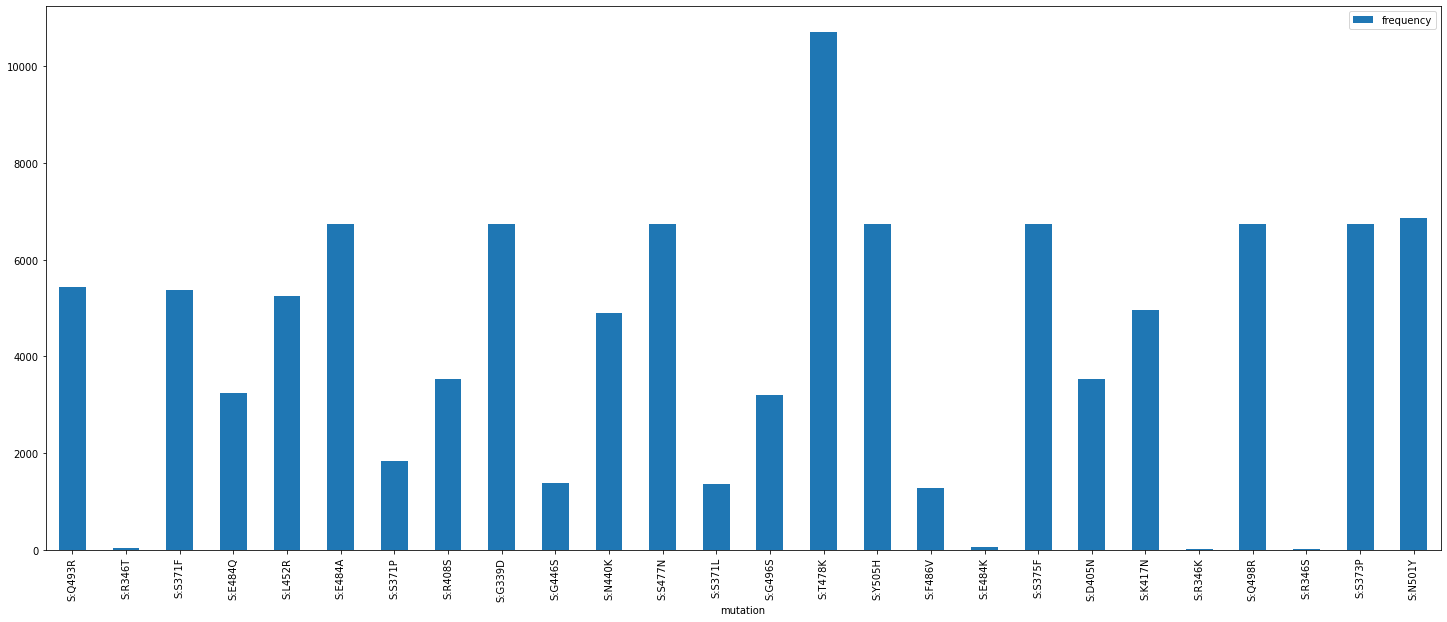

In [195]:
from itertools import chain

unique_mutations = set(','.join(master_variant['VinTEBS'].unique()).split(','))
ref = pd.read_csv('gene_reference.csv', engine='python')
# print(unique_mutations)

total_freq = {key: [] for key in unique_mutations}
all_vintebs = master_variant['VinTEBS'].tolist()

for mut in list(unique_mutations):
    for idx, vintebs in enumerate(all_vintebs):
        if mut in vintebs:
            total_freq[mut].append(master_variant.iloc[idx]['frequency'])
    
mutation_frequency = {key: sum(value) for key, value in total_freq.items()}
print(mutation_frequency)


keys = mutation_frequency.keys()
values = mutation_frequency.values()

mut_freq = pd.DataFrame.from_dict({'mutation': list(keys), 'frequency': list(values)})

mut_freq.plot.bar(x='mutation', y='frequency', figsize=(25, 10))
mut_freq.iloc[:100]
